<IPython.core.display.Javascript object>


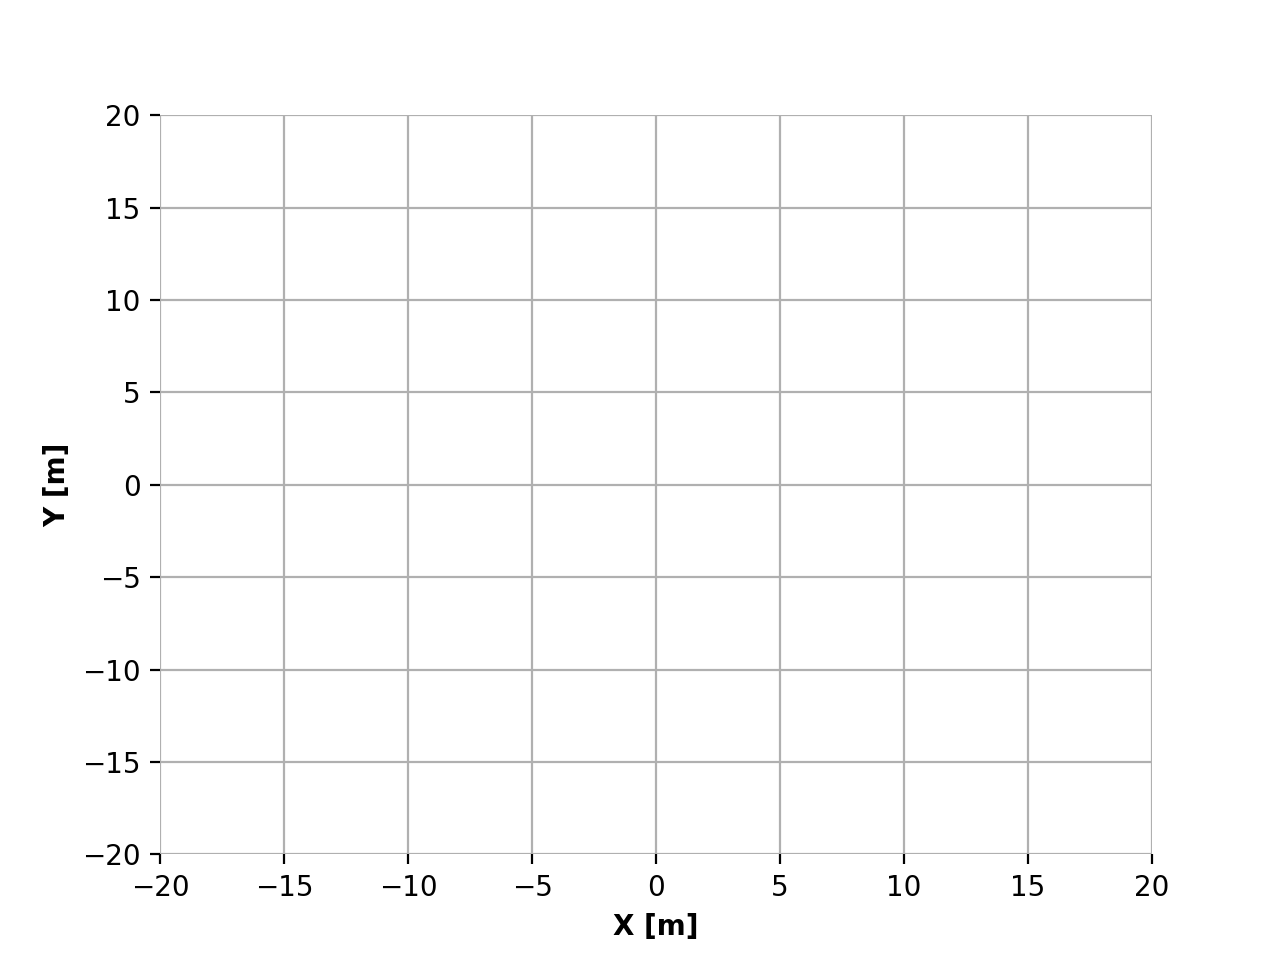

<IPython.core.display.Javascript object>


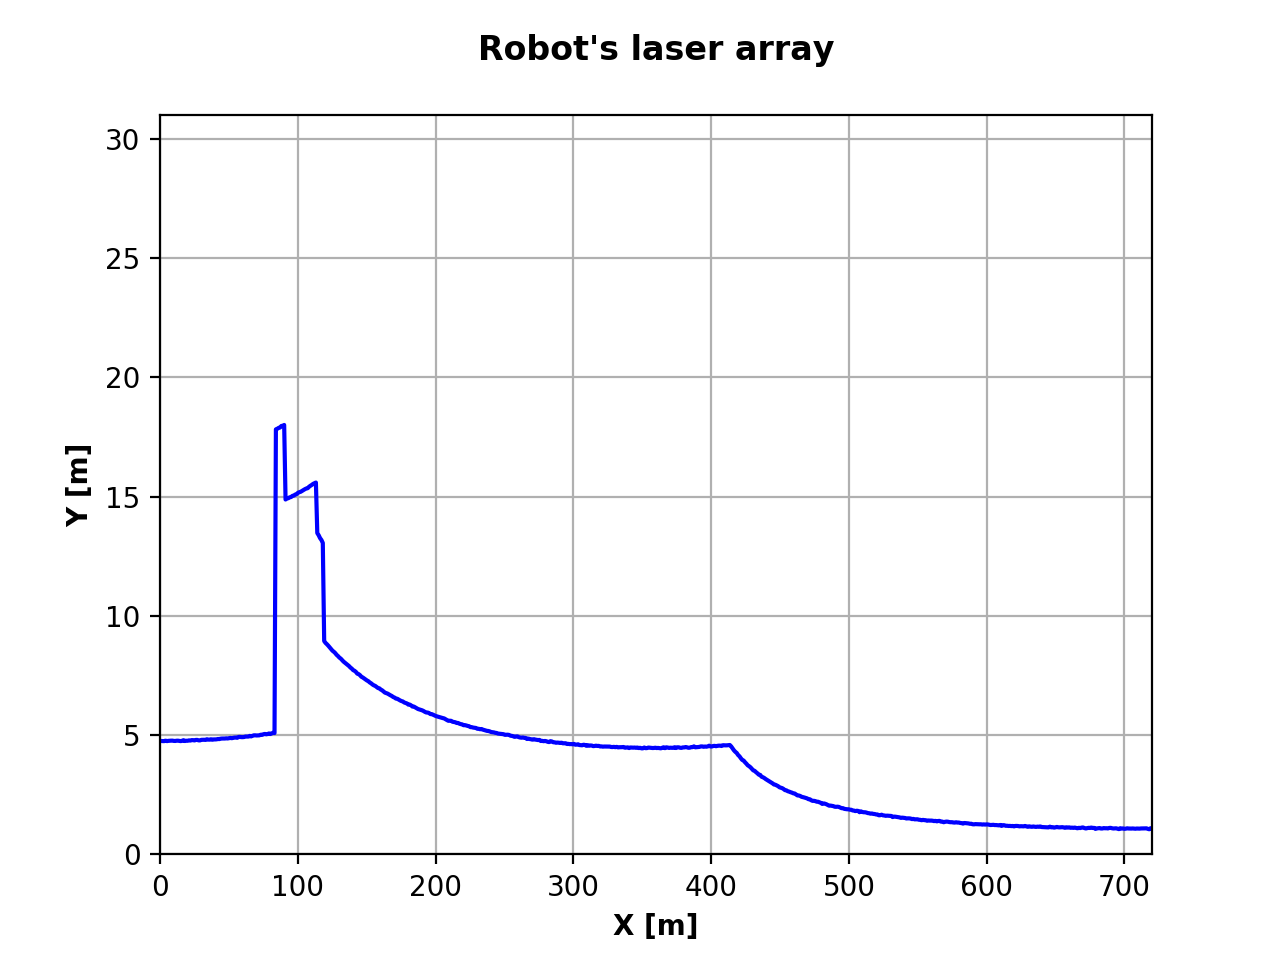

<IPython.core.display.Javascript object>


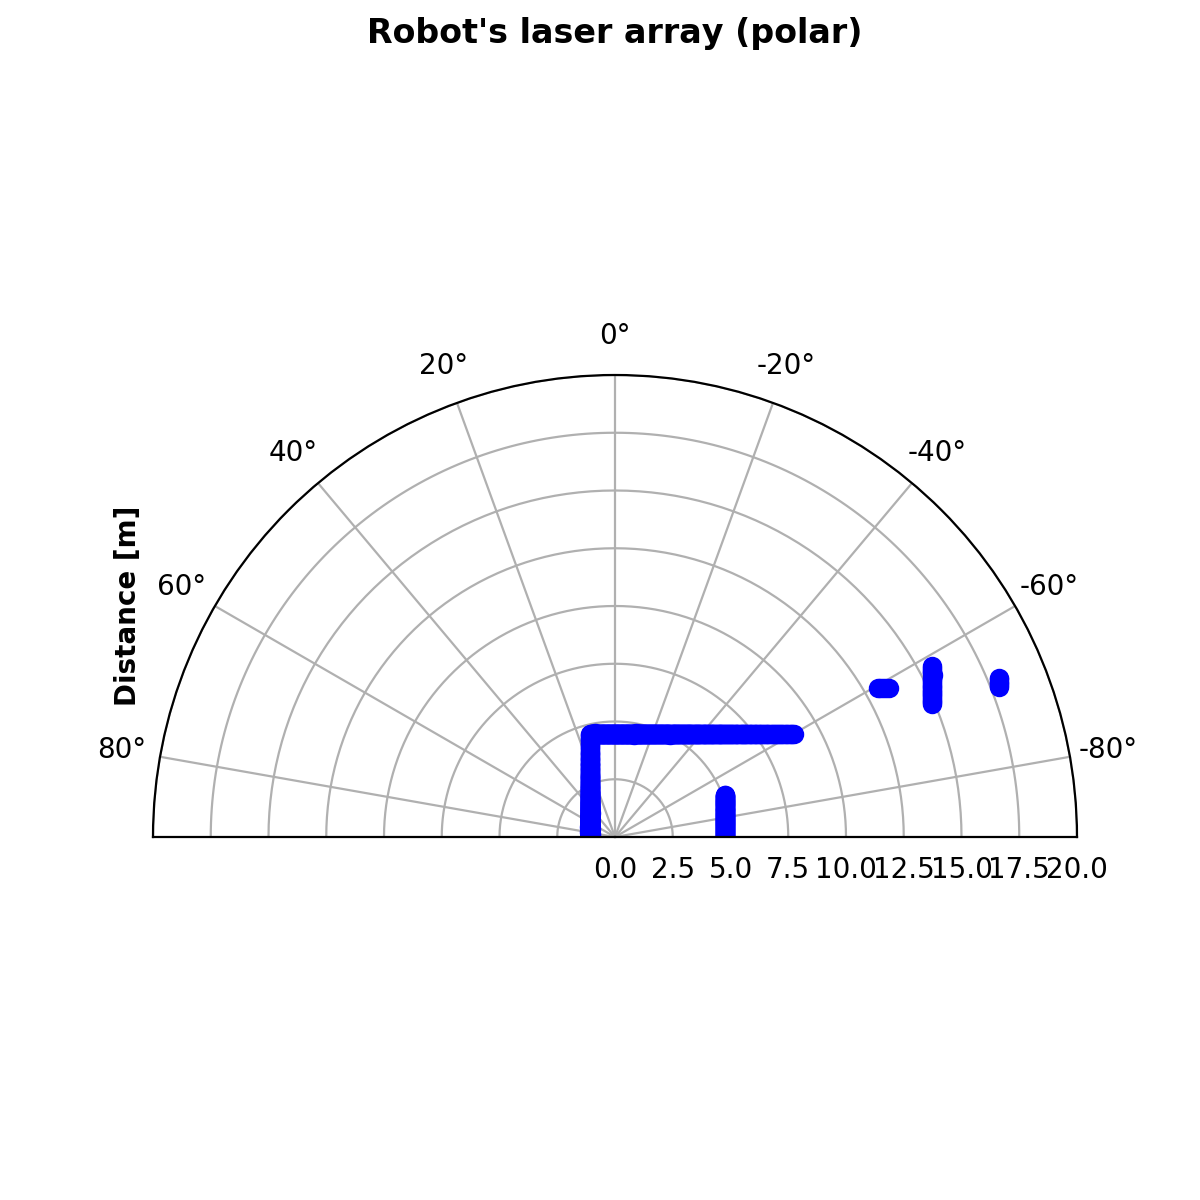

In [5]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import rospy
import tf
from tf.transformations import quaternion_matrix 
import numpy as np
from matplotlib.animation import FuncAnimation
from sensor_msgs.msg import LaserScan
from move_base_msgs.msg import MoveBaseActionGoal 
from nav_msgs.msg import Odometry
from actionlib_msgs.msg import GoalStatusArray
import time

angles = []

class Visualiser:
    
    def __init__(self):
        self.fig, self.ax = plt.subplots() 
        self.ln, = plt.plot([], [], 'ro')
        plt.grid(True)
        
        self.fig2,self.ax2 = plt.subplots()
        self.ln2,= plt.plot([], [], 'b-')
        plt.grid(True)
        
        self.figp = plt.figure(figsize=(6,6))
        self.ax_p = plt.subplot(111, polar=True)
        self.ax_p.set_thetalim(-np.pi/2,np.pi/2)
        
        self.ax_p.set_theta_zero_location("N")
        self.lnp, = self.ax_p.plot([],[],'bo')
        plt.grid(True)
        
        self.x_data, self.y_data = [] , []
        self.scanner = []
        
        
    def plot_init(self): 
        
        self.ax.set_title("Odometry of the Robot\n",fontweight="bold")
        self.ax.set_xlim(-20, 20) 
        self.ax.set_ylim(-20, 20) 
        self.ax.set_xlabel("X [m]",fontweight="bold")
        self.ax.set_ylabel("Y [m]",fontweight="bold")
        
        self.ax2.set_title("Robot's laser array\n",fontweight="bold")
        self.ax2.set_xlim(0, 720)
        self.ax2.set_ylim(0,31)
        self.ax2.set_xlabel("X [m]",fontweight="bold")
        self.ax2.set_ylabel("Y [m]",fontweight="bold")
        
        self.ax_p.set_title("Robot's laser array (polar)\n",fontweight="bold")
        self.ax_p.set_ylabel("Distance [m]",fontweight="bold")
        self.ax_p.set_rmax(20)
        
        return self.ln, self.ln2, self.lnp
        
    
    def odom_callback(self, msg): 
        
        self.y_data.append(msg.pose.pose.position.y) 
        self.x_data.append(msg.pose.pose.position.x)
        
    def cb_laser(self, msg): 
        
        global angles 
        
        self.scanner = list(msg.ranges)
        angles = list(np.arange(msg.angle_min, msg.angle_max + msg.angle_increment, msg.angle_increment))
        
        return self.scanner
        
        
    def update_plot(self, frame): 
        
        self.ln.set_data(self.x_data, self.y_data) 
        
        return self.ln
    
    def update_plot2(self, frame):
        
        self.ln2.set_data(list(np.linspace(0,720,720)),self.scanner)
        
        return self.ln2
    
    def update_polar(self, frame):
        
        global angles 
        
        self.lnp.set_data(angles,self.scanner)
        return self.lnp


rospy.init_node('data_visualization')

vis = Visualiser()

sub = rospy.Subscriber('/odom', Odometry, vis.odom_callback)

sub2 = rospy.Subscriber('/scan', LaserScan, vis.cb_laser)

ani = FuncAnimation(vis.fig, vis.update_plot, init_func = vis.plot_init) 
ani2= FuncAnimation(vis.fig2, vis.update_plot2, init_func = vis.plot_init)
anip= FuncAnimation(vis.figp,vis.update_polar,init_func = vis.plot_init)

plt.show(block=True)